# BGC1000006 Atom Mapping Visualization

Complete visualization of all 6 reaction steps for BGC1000006.

In [5]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import AllChem, rdChemReactions
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image
import io

# Read AAM data
aam_file = Path("3_templates/data/aam.ndjson")
reactions = []

with aam_file.open('r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            rec = json.loads(line)
            if rec['reaction_id'].startswith('BGC1000006'):
                reactions.append(rec)

print(f"Found {len(reactions)} reactions for BGC1000006")
for r in reactions:
    print(f"  - {r['reaction_id']}")


Found 6 reactions for BGC1000006
  - BGC1000006_m0_to_m1
  - BGC1000006_m1_to_m2
  - BGC1000006_m2_to_m3
  - BGC1000006_m3_to_m4
  - BGC1000006_m4_to_m5
  - BGC1000006_m5_to_m6


In [6]:
def visualize_reaction_with_aam(mapped_smarts, title, img_size=(1200, 400)):
    """
    Visualize a reaction with atom mapping numbers using RDKit.
    Based on SynTemp's ChemicalReactionVisualizer approach.
    """
    # Parse reaction
    rxn = rdChemReactions.ReactionFromSmarts(mapped_smarts, useSmiles=True)
    if rxn is None:
        return None
    
    # Preprocess
    rdChemReactions.PreprocessReaction(rxn)
    
    # Add atom map numbers as labels
    for mol in list(rxn.GetReactants()) + list(rxn.GetProducts()):
        for atom in mol.GetAtoms():
            map_num = atom.GetAtomMapNum()
            if map_num > 0:
                atom.SetProp("atomLabel", str(map_num))
    
    # Create drawer
    drawer = rdMolDraw2D.MolDraw2DCairo(img_size[0], img_size[1])
    
    # Configure options
    opts = drawer.drawOptions()
    opts.bondLineWidth = 2.5
    opts.atomLabelFontSize = 18
    opts.padding = 0.08
    opts.addStereoAnnotation = True
    
    # Draw reaction
    drawer.DrawReaction(rxn, highlightByReactant=True)
    drawer.FinishDrawing()
    
    # Get PNG data
    png_data = drawer.GetDrawingText()
    img = Image.open(io.BytesIO(png_data))
    
    return img


[01:30:22] product atom-mapping number 5 not found in reactants.
[01:30:22] product atom-mapping number 6 not found in reactants.
[01:30:22] product atom-mapping number 7 not found in reactants.
[01:30:22] product atom-mapping number 5 not found in reactants.
[01:30:22] product atom-mapping number 6 not found in reactants.
[01:30:22] product atom-mapping number 7 not found in reactants.
[01:30:22] product atom-mapping number 5 not found in reactants.
[01:30:22] product atom-mapping number 6 not found in reactants.
[01:30:22] product atom-mapping number 7 not found in reactants.


AttributeError: Cannot set unknown attribute 'atomLabelFontSize'

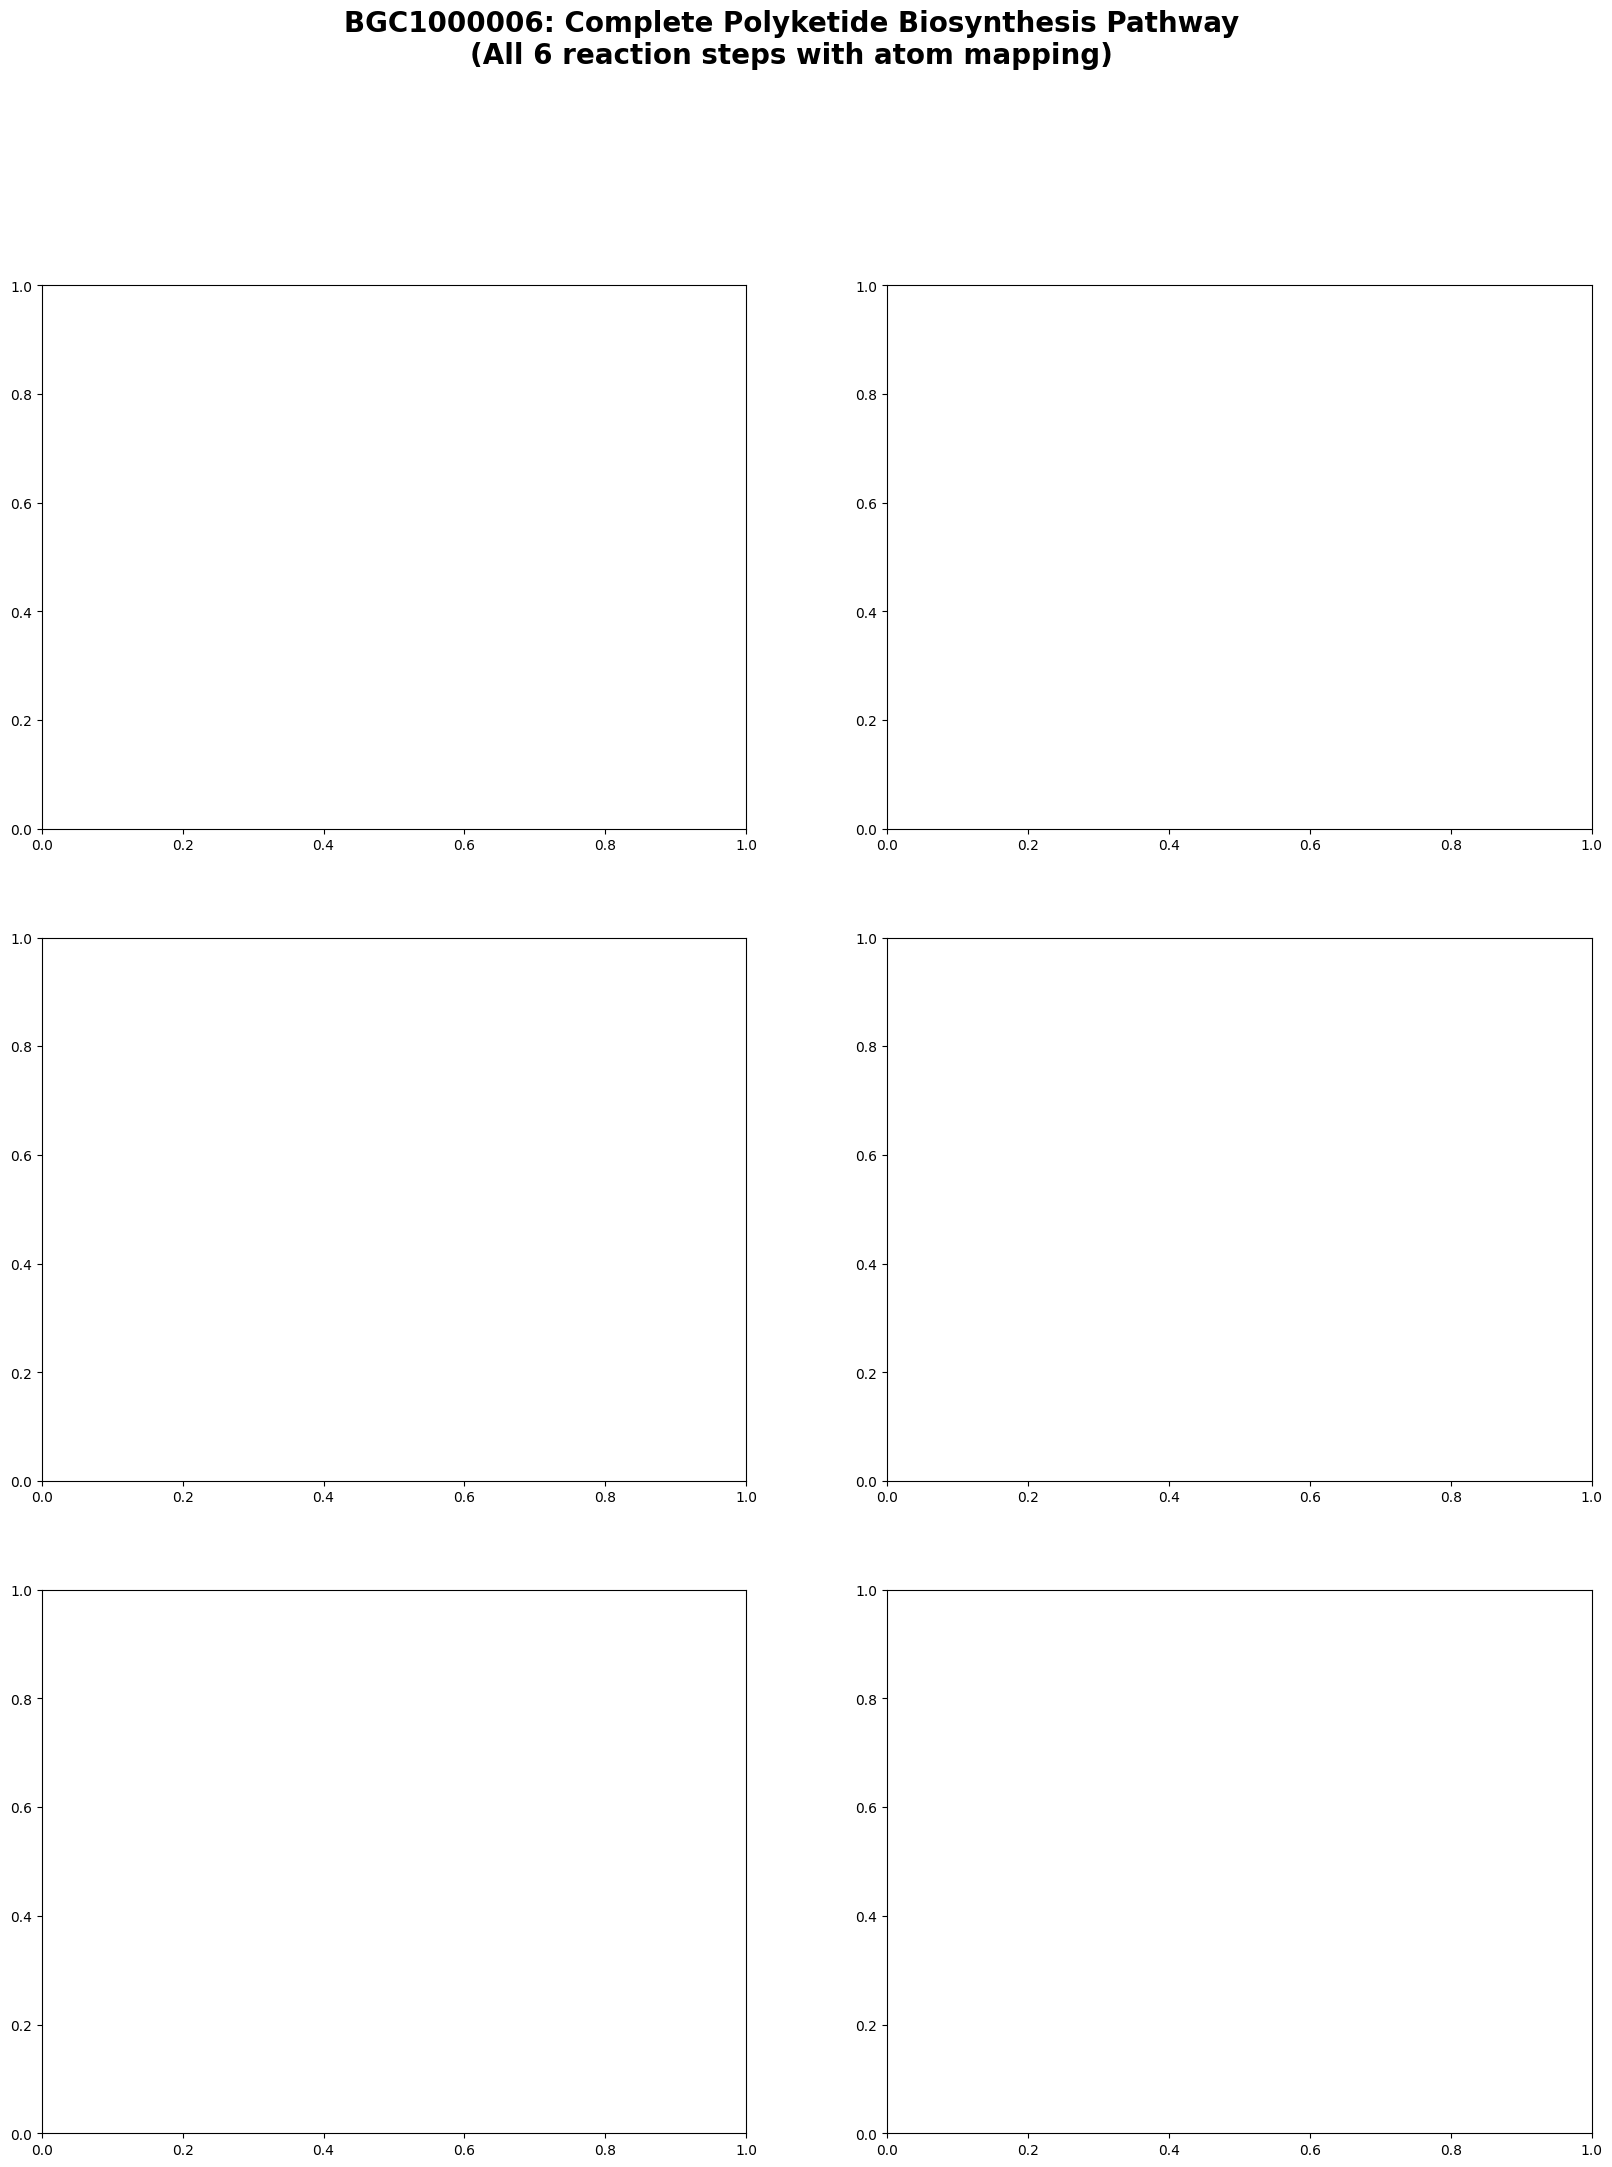

In [7]:
# Create a combined visualization of all 6 reactions
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle('BGC1000006: Complete Polyketide Biosynthesis Pathway\n(All 6 reaction steps with atom mapping)', 
             fontsize=20, fontweight='bold', y=0.995)

# Flatten axes for easy iteration
axes = axes.flatten()

# Visualize each reaction
for idx, rec in enumerate(sorted(reactions, key=lambda x: x['reaction_id'])):
    reaction_id = rec['reaction_id']
    mapped_smarts = rec['aam']
    unmapped_rxn = rec['reactions']
    
    # Create visualization
    img = visualize_reaction_with_aam(mapped_smarts, reaction_id)
    
    # Display in subplot
    ax = axes[idx]
    ax.imshow(img)
    ax.axis('off')
    
    # Add title with step number
    step_num = reaction_id.split('_')[-3] + '_to_' + reaction_id.split('_')[-1]
    ax.set_title(f'{reaction_id}\n{unmapped_rxn}', 
                fontsize=12, fontweight='bold', pad=10, family='monospace')

plt.tight_layout()
plt.savefig('BGC1000006_complete_pathway_aam.png', dpi=200, bbox_inches='tight', facecolor='white')
print("Saved: BGC1000006_complete_pathway_aam.png")
plt.show()
